# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
# Assign class names based on CIFAR-10 documentation

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


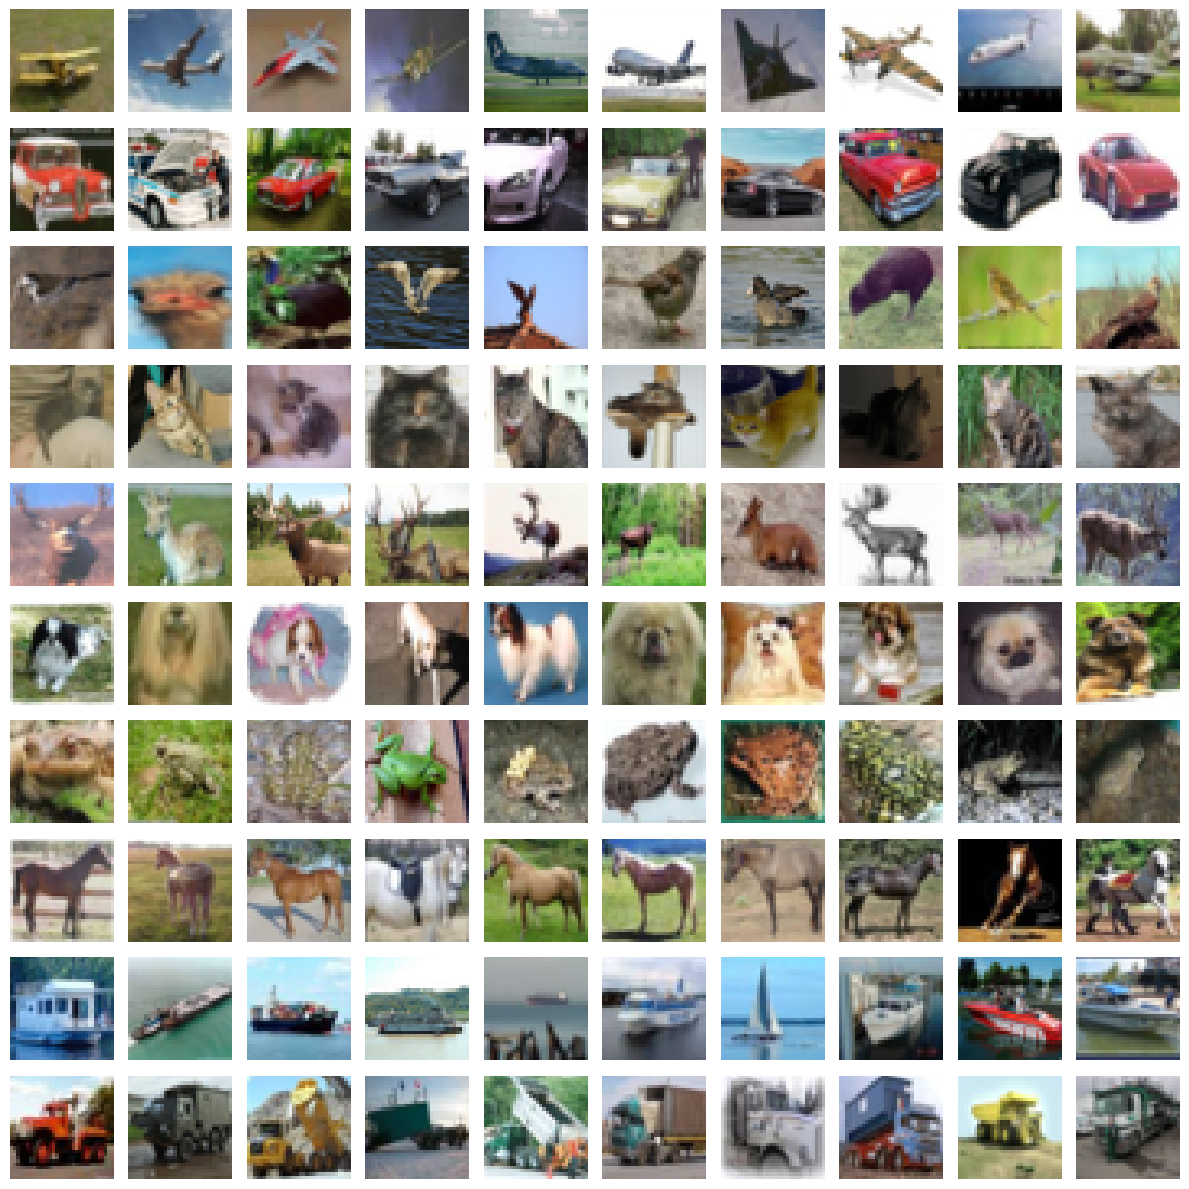

In [5]:
# Display 10 random images of each class

# Step 1: create empty dictionary to store images by class

class_buckets = {i: [] for i in range(10)}

# Step 2: Fill the dictionary with images corresponding to each class

for img, label in zip(x_train, y_train.flatten()):
  class_buckets[label].append(img)

# Set up the figure for a 10x10 plot
plt.figure(figsize=(12, 12))  # Adjust size for clarity

# Loop over each class (0-9)
for class_idx in range(10):
    # Randomly select 10 images from the current class
    selected_images = np.random.choice(len(class_buckets[class_idx]), 10, replace=False)

    # Plot these images
    for i, img_idx in enumerate(selected_images):
        plt.subplot(10, 10, class_idx * 10 + i + 1)  # Calculate position in grid
        plt.imshow(class_buckets[class_idx][img_idx])
        plt.axis('off')  # Turn off axes for cleaner visuals

        # Add class name as row label for the first column
        if i == 0:
            plt.ylabel(class_names[class_idx], rotation=0,
                       labelpad=40, fontsize=10, ha='right', va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [6]:
# One-hot encode the labels

from keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Check the result
print("Original label:", y_train[0])
print("One-hot encoded:", y_train_one_hot[0])

Original label: [6]
One-hot encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
# Normalize the dataset

# Normalize pixel values
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Check the result
print("Before normalization, max pixel value:", x_train.max())
print("After normalization, max pixel value:", x_train_normalized.max())

Before normalization, max pixel value: 255
After normalization, max pixel value: 1.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [13]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
clear_session()

In [15]:
model_simple = Sequential()

model_simple.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_simple.add(MaxPooling2D((2, 2)))

model_simple.add(Flatten())
model_simple.add(Dense(100, activation='relu'))
model_simple.add(Dense(10, activation='softmax')) # Output layer for CIFAR-10 classes

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [16]:
# Compile
model_simple.compile(optimizer='SGD',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Check the model summary
model_simple.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model

batch_size = 512
epochs = 50

history = model_simple.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    shuffle=True,
    verbose=1
    )

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1546 - loss: 2.2696 - val_accuracy: 0.2109 - val_loss: 2.1950
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2378 - loss: 2.1578 - val_accuracy: 0.2325 - val_loss: 2.0924
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2741 - loss: 2.0613 - val_accuracy: 0.2774 - val_loss: 2.0163
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2993 - loss: 1.9857 - val_accuracy: 0.2579 - val_loss: 2.0191
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3246 - loss: 1.9406 - val_accuracy: 0.2728 - val_loss: 1.9853
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3371 - loss: 1.9062 - val_accuracy: 0.3016 - val_loss: 1.9761
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3497 - loss: 1.8812 - val_accuracy: 0.3092 - val_loss: 1.9177
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3505 - loss: 1.8619 - val_accuracy: 0.2914 - v

*   Plot the cross entropy loss curve and the accuracy curve

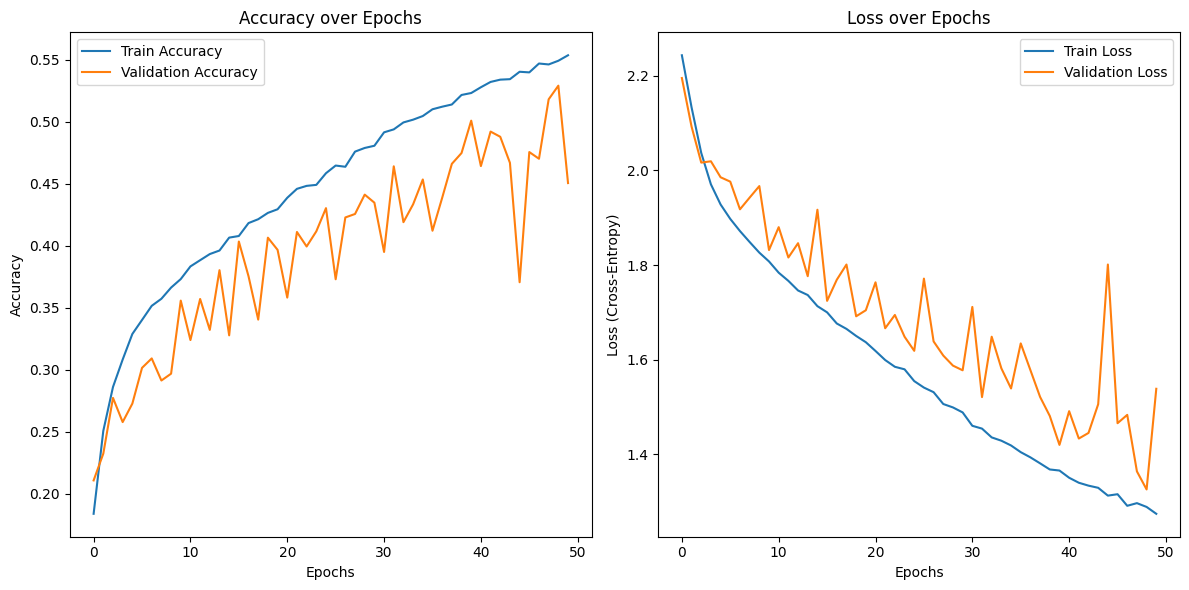

In [19]:
# Accessing the metric data from the history object

train_accuracy = history.history['accuracy']   # Training accuracy over epochs
train_loss = history.history['loss']           # Training loss over epochs
val_accuracy = history.history['val_accuracy']  # Validation accuracy over epochs
val_loss = history.history['val_loss']          # Validation loss over epochs

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)  # (rows, cols, index)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)  # (rows, cols, index)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cross-Entropy)')
plt.legend()

plt.tight_layout()  # Adjust layout
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [20]:
from keras.backend import clear_session
clear_session()

In [21]:
# create deeper VGG model

model_deeper = Sequential()

model_deeper.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_deeper.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_deeper.add(MaxPooling2D((2, 2)))

model_deeper.add(Flatten())
model_deeper.add(Dense(128, activation='relu'))
model_deeper.add(Dense(10, activation='softmax')) # Output layer for CIFAR-10 classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [23]:
# Compile the model

model_deeper.compile(optimizer='SGD',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model

batch_size = 512
epochs = 50

history = model_deeper.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    shuffle=True,
    verbose=1
    )

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.1062 - loss: 2.2900 - val_accuracy: 0.2097 - val_loss: 2.2237
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2291 - loss: 2.1865 - val_accuracy: 0.2458 - val_loss: 2.0940
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2789 - loss: 2.0488 - val_accuracy: 0.2737 - val_loss: 2.0447
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2980 - loss: 1.9881 - val_accuracy: 0.3159 - val_loss: 1.9633
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3149 - loss: 1.9498 - val_accuracy: 0.3314 - val_loss: 1.9053
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3430 - loss: 1.8810 - val_accuracy: 0.3062 - val_loss: 1.9126
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3444 - loss: 1.8648 - val_accuracy: 0.2427 - val_loss: 2.0710
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3578 - loss: 1.8291 - val_accuracy: 0.3189 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


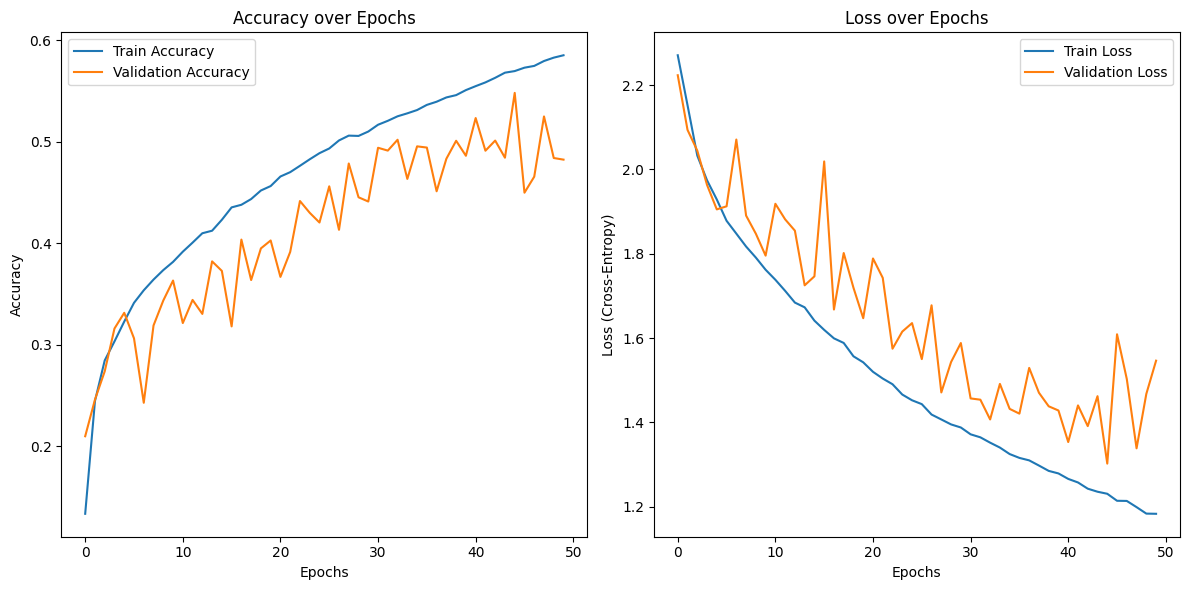

In [24]:
# Accessing the metric data from the history object

train_accuracy = history.history['accuracy']   # Training accuracy over epochs
train_loss = history.history['loss']           # Training loss over epochs
val_accuracy = history.history['val_accuracy']  # Validation accuracy over epochs
val_loss = history.history['val_loss']          # Validation loss over epochs

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)  # (rows, cols, index)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)  # (rows, cols, index)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cross-Entropy)')
plt.legend()

plt.tight_layout()  # Adjust layout
plt.show()

**Comment on the observation**

- The deeper model shows a slightly higher accuracy and lower loss (as expected)

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [25]:
# Make predictions using the VGG model

y_pred_prob = model_deeper.predict(x_test_normalized)  # Output: probabilities for each class

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the index of the highest probability (predicted class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


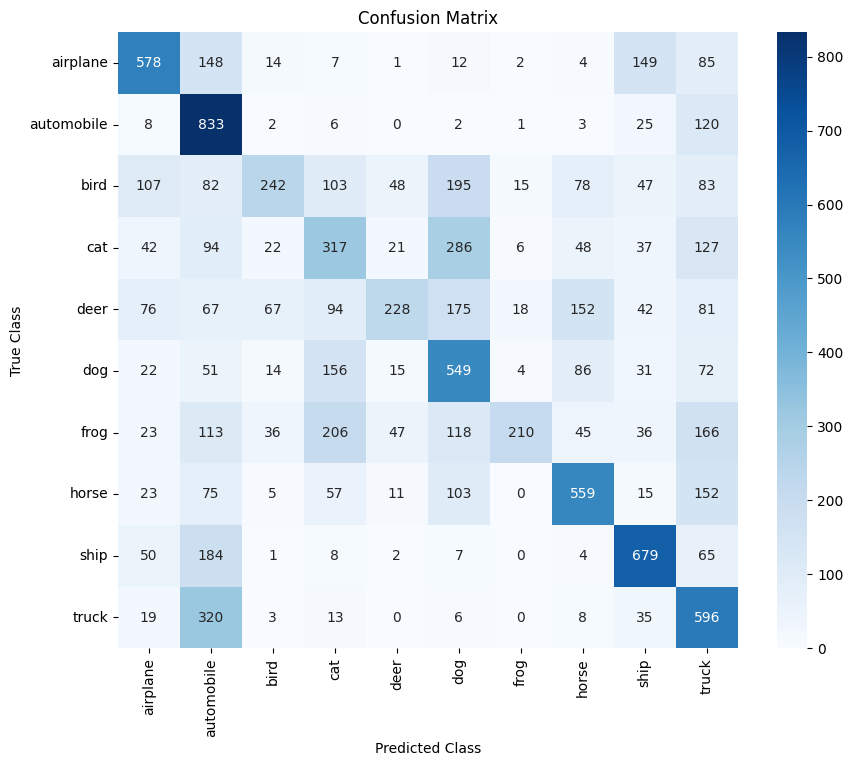

In [26]:
# Plot confusion matrix for generated predictions

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Comment here :**

- Confusion matrix shows that the model has problems differentiating e.g. between images of the truck and the automobile classes
...

*    Print the test accuracy for the trained model.

In [27]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_simple.evaluate(x_test_normalized, y_test_one_hot)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4522 - loss: 1.5195
Test Accuracy: 44.95%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [29]:
from keras.backend import clear_session
clear_session()

In [40]:
# create complete VGG model

model_complete = Sequential()

model_complete.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model_complete.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_complete.add(MaxPooling2D((2, 2)))

model_complete.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_complete.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_complete.add(MaxPooling2D((2, 2)))

model_complete.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_complete.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_complete.add(MaxPooling2D((2, 2)))

model_complete.add(Flatten())
model_complete.add(Dense(4096, activation='relu'))
model_complete.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [41]:
# Compile the model

model_complete.compile(optimizer='SGD',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model

batch_size = 512
epochs = 10

history = model_deeper.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    shuffle=True,
    verbose=1
    )

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6806 - loss: 0.9380 - val_accuracy: 0.5652 - val_loss: 1.2602
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6814 - loss: 0.9281 - val_accuracy: 0.5834 - val_loss: 1.2153
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6819 - loss: 0.9235 - val_accuracy: 0.5814 - val_loss: 1.2114
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6808 - loss: 0.9226 - val_accuracy: 0.6002 - val_loss: 1.1503
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6845 - loss: 0.9129 - val_accuracy: 0.5828 - val_loss: 1.2354
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6847 - loss: 0.9140 - val_accuracy: 0.5860 - val_loss: 1.2023
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6818 - loss: 0.9132 - val_accuracy: 0.6032 - val_loss: 1.1562
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6963 - loss: 0.8845 - val_accuracy: 0.5504 - v

In [42]:
# Make predictions using the VGG model

y_pred_prob2 = model_complete.predict(x_test_normalized)  # Output: probabilities for each class

# Convert probabilities to class labels
y_pred2 = np.argmax(y_pred_prob2, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


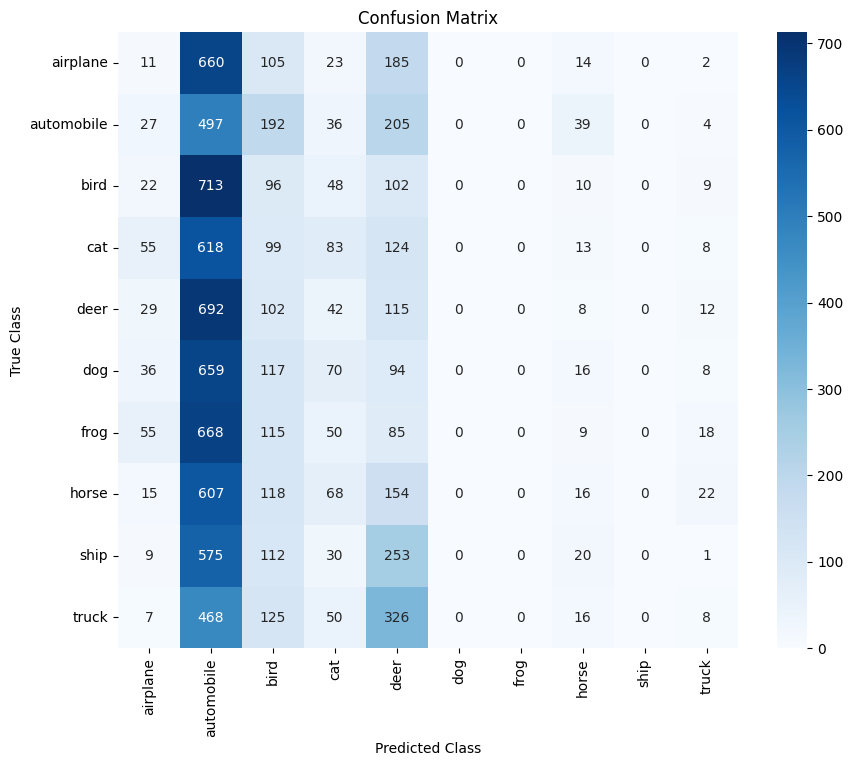

In [43]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Comment: The model is now classifying a large amount of images incorrectly as "automobile".

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into a neural network. Without them, a network composed entirely of linear operations (e.g., matrix multiplications) would be unable to learn complex patterns in data. Specifically, the entire network would act as a linear transformation, regardless of its depth.


2 - Key Differences between sigmoid and softmax:

Sigmoid Activation: Used in binary classification tasks where a single output neuron represents the probability of a class (e.g., yes/no, true/false).

Softmax: Used in multi-class classification problems where the model needs to assign probabilities to multiple classes.


3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary Crossentropy: Used for binary classification tasks (e.g., yes/no, true/false).

Categorical Crossentropy: Used for multi-class classification tasks.
